In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('Rice_Production.csv')

# Display the structure of the dataset
data.head()  # Display the first few rows

,District,Year,Surface_Pressure,Specific_Humidity,Relative_Humidity,Wind_Speed,Surface_Soil_Wetness,Temperature_Maximum,Temperature_Minimum,Profile_Soil_Moisture,Root_Zone_Soil_Wetness,Temperature_Range,Precipitation_Corrected,Area,Production
0,Chittagong,1991,100.460000,14.883333,67.688333,2.671667,0.414167,33.875833,20.391667,0.456667,0.459167,13.484167,2.383333,1078760.0,822060.0
1,Chittagong,1992,100.475000,15.300833,73.369167,2.680000,0.475000,33.053333,19.263333,0.483333,0.491667,13.790000,2.463333,924840.0,819450.0
2,Chittagong,1993,100.493333,14.556667,67.338333,2.547500,0.434167,33.511667,19.495000,0.455833,0.462500,14.016667,2.523333,894790.0,820820.0
3,Chittagong,1994,100.421667,15.095833,70.115833,2.631667,0.483333,33.212500,19.833333,0.495000,0.502500,13.376667,3.040000,862960.0,793920.0
4,Chittagong,1995,100.450833,14.565833,66.947500,2.622500,0.469167,33.325000,19.880833,0.485833,0.495000,13.444167,2.480833,812850.0,763310.0


In [3]:
data.columns

Index(['District', 'Year', 'Surface_Pressure', 'Specific_Humidity',
       'Relative_Humidity', 'Wind_Speed', 'Surface_Soil_Wetness',
       'Temperature_Maximum', 'Temperature_Minimum', 'Profile_Soil_Moisture',
       'Root_Zone_Soil_Wetness', 'Temperature_Range',
       'Precipitation_Corrected', 'Area', 'Production'],
      dtype='object')

In [4]:
data.shape  # Display the dimensions (rows, columns) of the dataset

(600, 15)

In [5]:
data.info()  # Display the summary information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   District                 600 non-null    object 
 1   Year                     600 non-null    int64  
 2   Surface_Pressure         600 non-null    float64
 3   Specific_Humidity        600 non-null    float64
 4   Relative_Humidity        600 non-null    float64
 5   Wind_Speed               600 non-null    float64
 6   Surface_Soil_Wetness     600 non-null    float64
 7   Temperature_Maximum      600 non-null    float64
 8   Temperature_Minimum      600 non-null    float64
 9   Profile_Soil_Moisture    600 non-null    float64
 10  Root_Zone_Soil_Wetness   600 non-null    float64
 11  Temperature_Range        600 non-null    float64
 12  Precipitation_Corrected  600 non-null    float64
 13  Area                     600 non-null    float64
 14  Production               6

In [6]:
data.describe()  # Display the summary statistics of the dataset

,Year,Surface_Pressure,Specific_Humidity,Relative_Humidity,Wind_Speed,Surface_Soil_Wetness,Temperature_Maximum,Temperature_Minimum,Profile_Soil_Moisture,Root_Zone_Soil_Wetness,Temperature_Range,Precipitation_Corrected,Area,Production
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,6.000000e+02
mean,2005.500000,100.562361,15.001922,71.426551,2.068346,0.617224,33.753197,18.392197,0.627525,0.641524,15.361067,5.168896,9.695538e+05,9.140093e+05
std,8.662663,0.249241,1.183964,7.159386,0.396406,0.123821,1.664807,1.108046,0.104634,0.106444,2.379482,3.130330,5.186843e+05,5.080231e+05
min,1991.000000,99.521667,10.876667,46.411667,1.368333,0.280000,29.779167,15.850833,0.391667,0.395833,7.640000,0.917500,1.374426e+05,1.621800e+05
25%,1998.000000,100.488958,14.442917,68.634167,1.835208,0.573333,32.605625,17.800000,0.576667,0.591458,14.306875,3.425833,5.917452e+05,5.711185e+05
50%,2005.500000,100.627500,15.116667,72.504583,1.975833,0.632500,33.721667,18.190833,0.631250,0.653333,15.603333,4.579167,8.917820e+05,8.298070e+05
75%,2013.000000,100.705833,15.764375,76.759167,2.213333,0.685000,34.679583,18.648958,0.691667,0.705000,16.818125,5.961250,1.252505e+06,1.148925e+06
max,2020.000000,100.893333,17.547500,84.849167,3.655000,0.892500,38.314167,22.566667,0.885000,0.895000,20.639167,27.119167,4.323977e+06,6.733957e+06


In [7]:
temp = data.groupby("Year").mean()

In [8]:
temp["Production"]

Year
1991    8.874490e+05
1992    8.999145e+05
1993    9.099715e+05
1994    8.796880e+05
1995    8.283945e+05
1996    8.259805e+05
1997    9.296725e+05
1998    8.989870e+05
1999    9.360535e+05
2000    1.138923e+06
2001    1.239135e+06
2002    1.203337e+06
2003    1.245378e+06
2004    1.295015e+06
2005    1.244591e+06
2006    1.315344e+06
2007    6.171365e+05
2008    6.590728e+05
2009    7.125016e+05
2010    7.196001e+05
2011    7.533232e+05
2012    7.640607e+05
2013    7.432635e+05
2014    7.498759e+05
2015    1.060184e+06
2016    7.739186e+05
2017    7.641275e+05
2018    8.106448e+05
2019    8.062464e+05
2020    8.084903e+05
Name: Production, dtype: float64

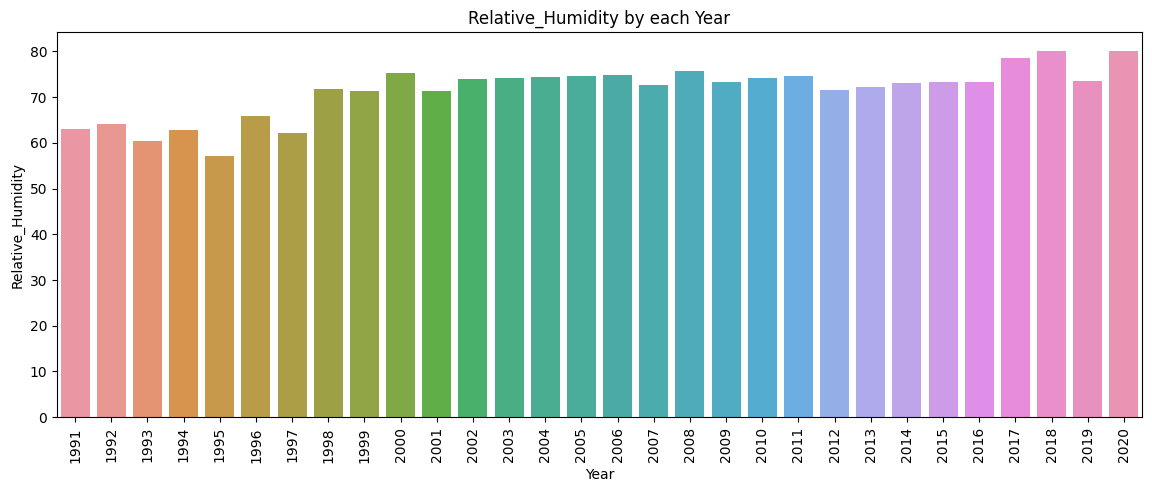

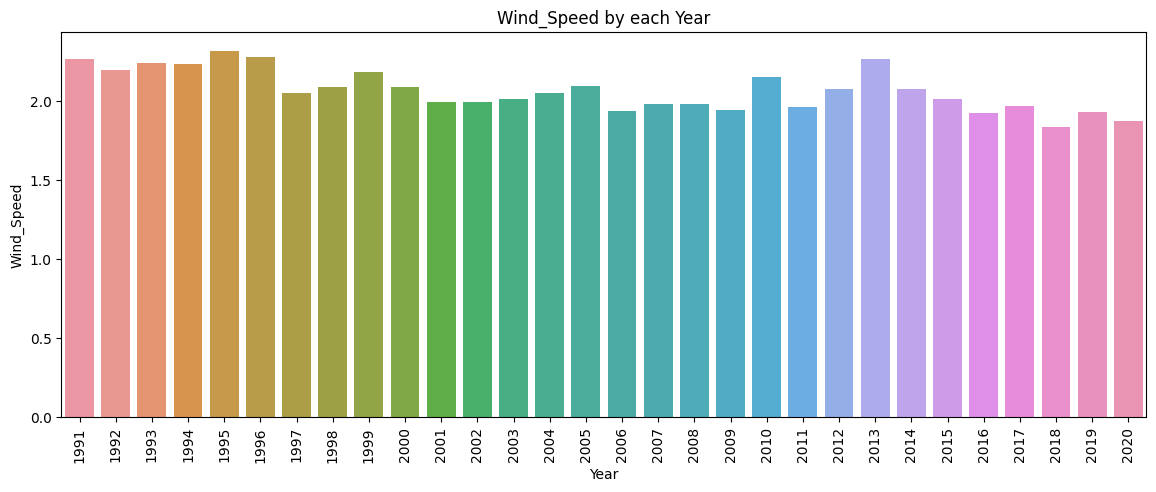

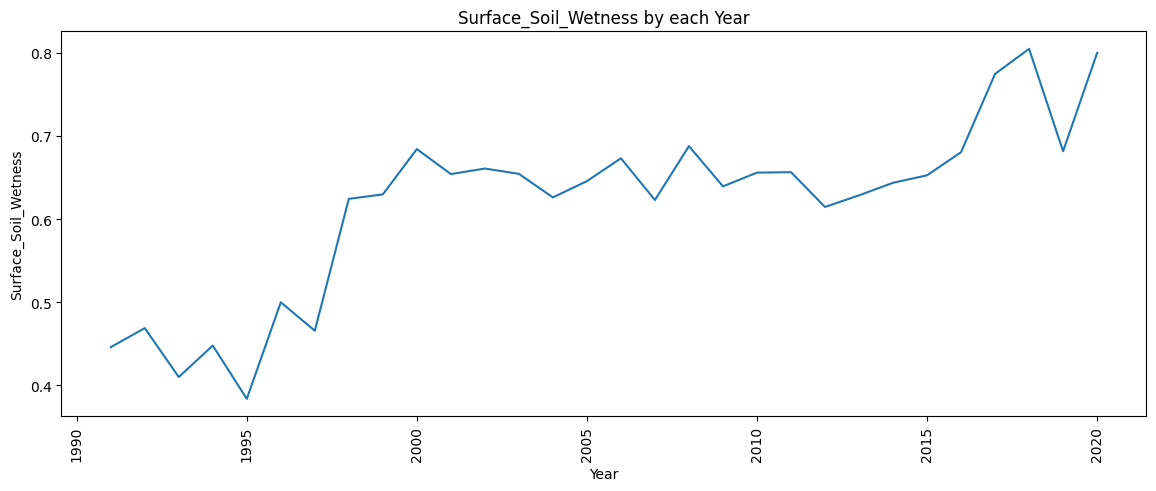

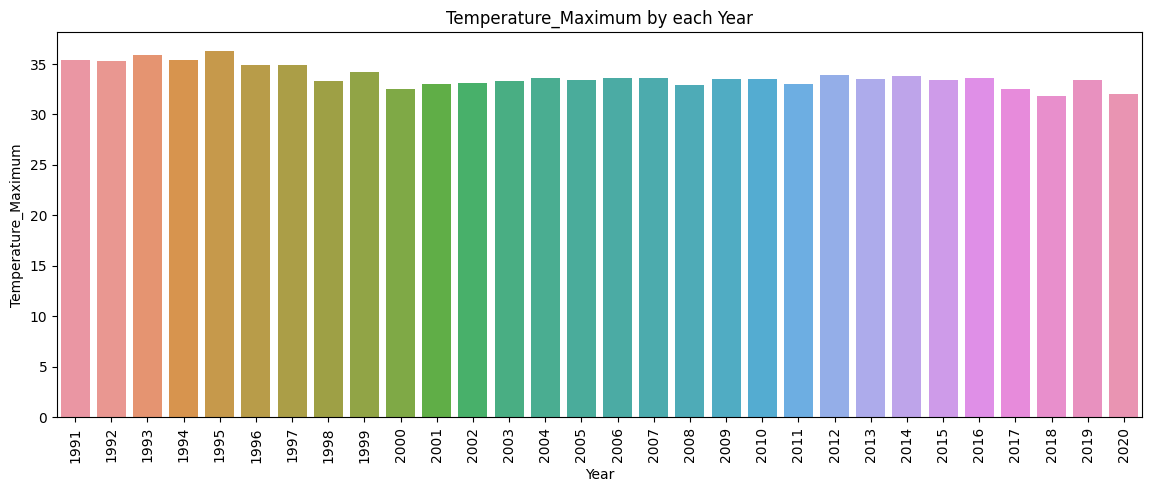

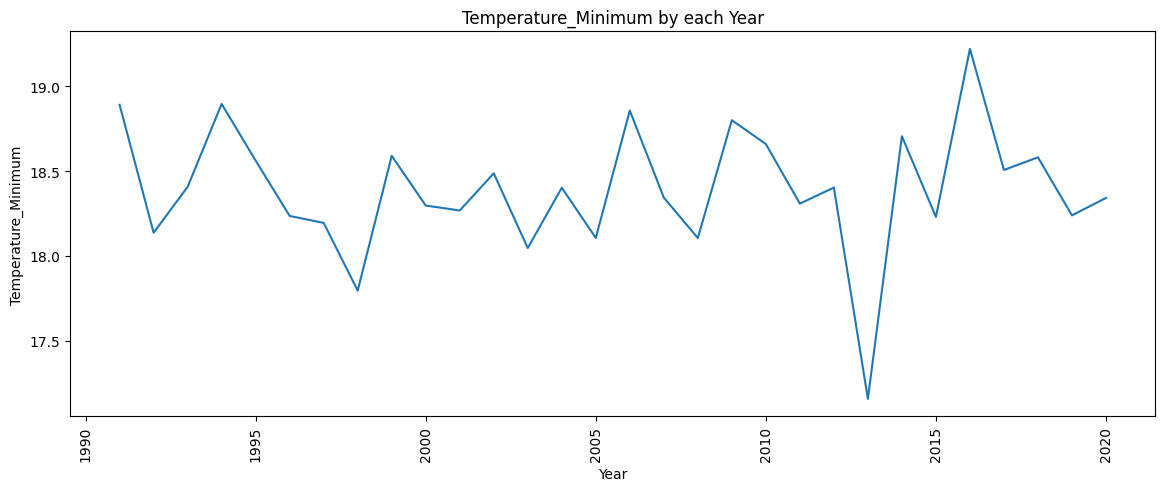

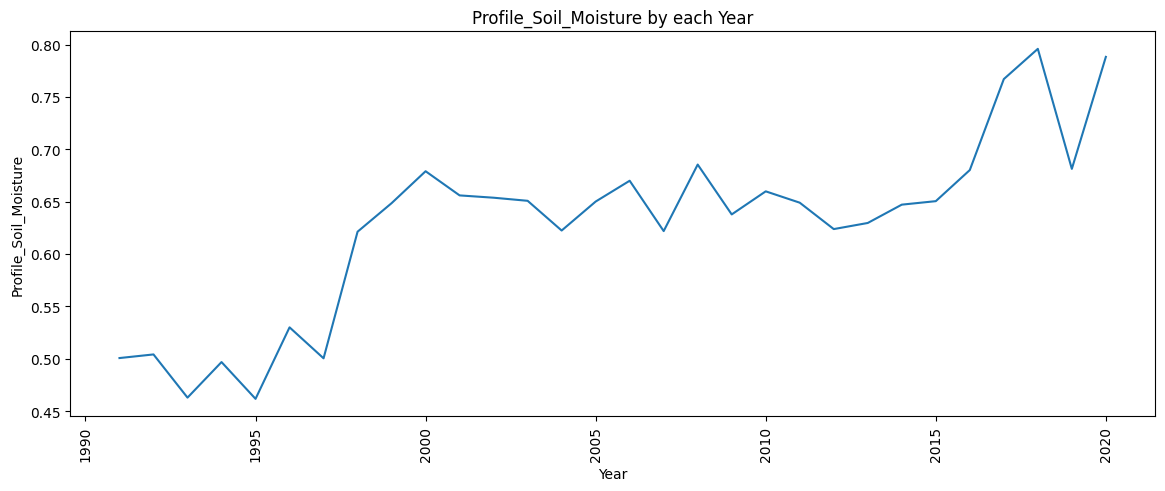

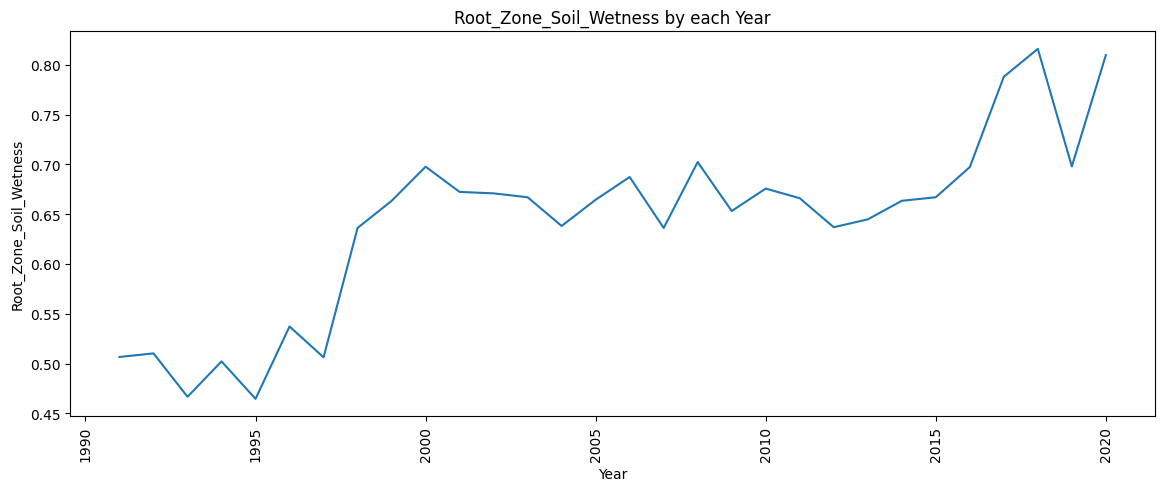

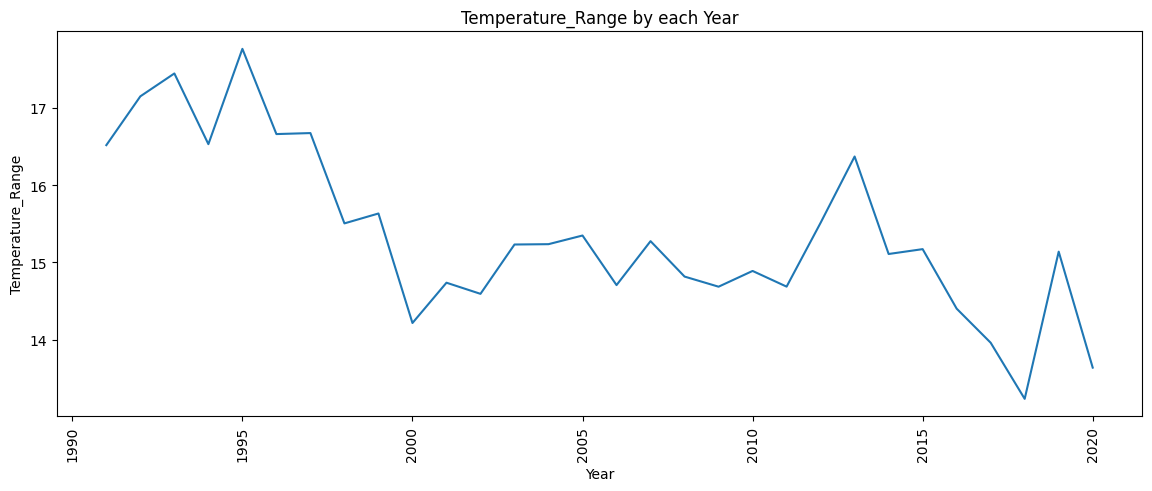

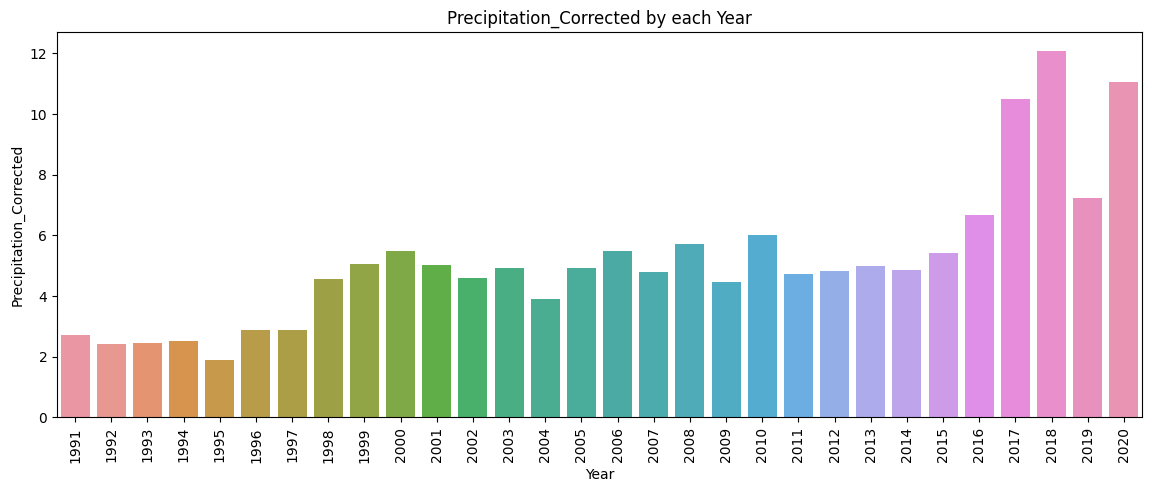

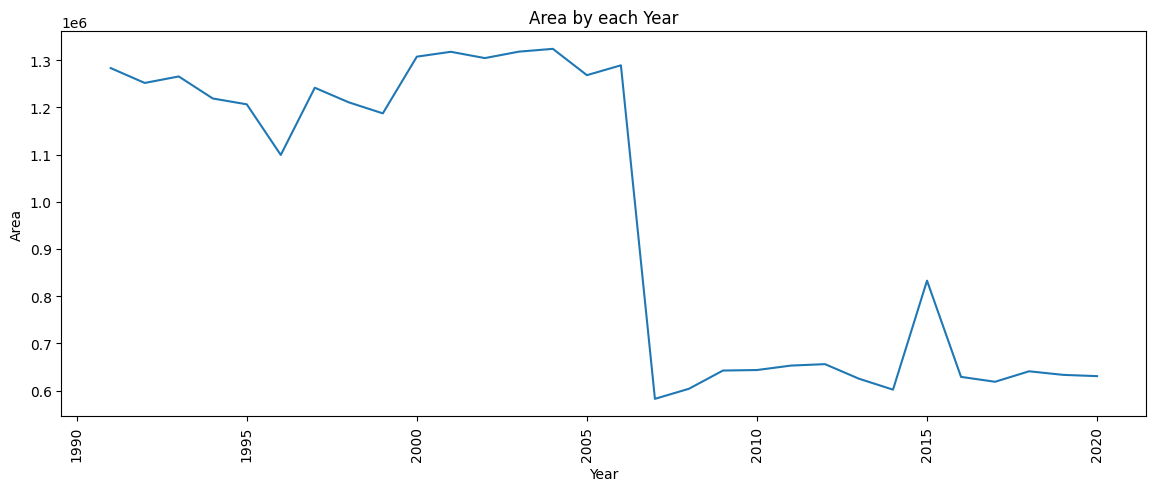

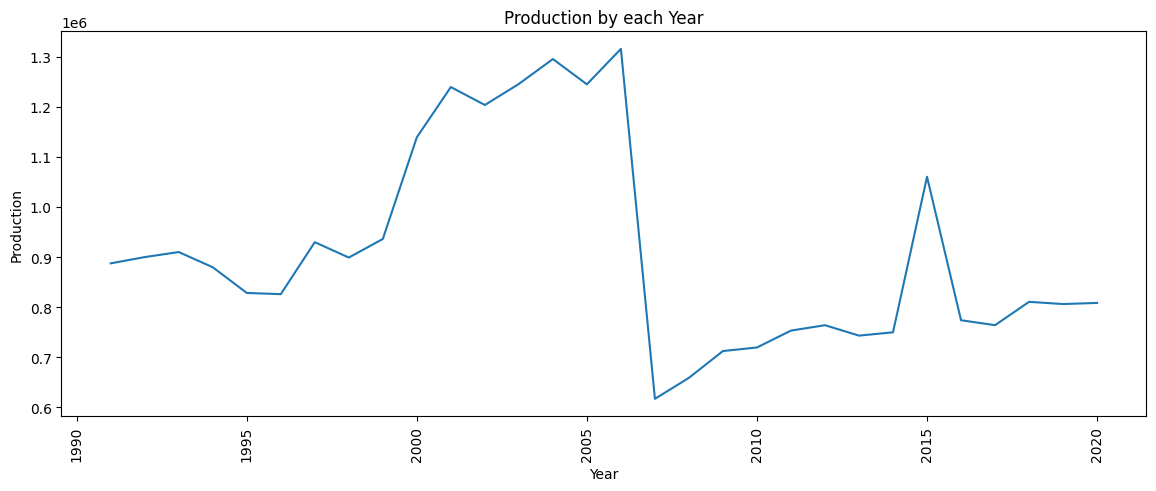

In [9]:
for i in temp.iloc[:, 2:].columns:
    choice = np.random.choice(["line", "bar"])
    plt.figure(figsize=(14, 5))

    if choice == "bar":
        sns.barplot(x=temp[i].index, y=temp[i].values)
    else:
        sns.lineplot(x=temp[i].index, y=temp[i].values)
    plt.title(f"{i} by each Year")
    plt.xlabel("Year")
    plt.ylabel(i)
    plt.xticks(rotation=90)
    plt.show()

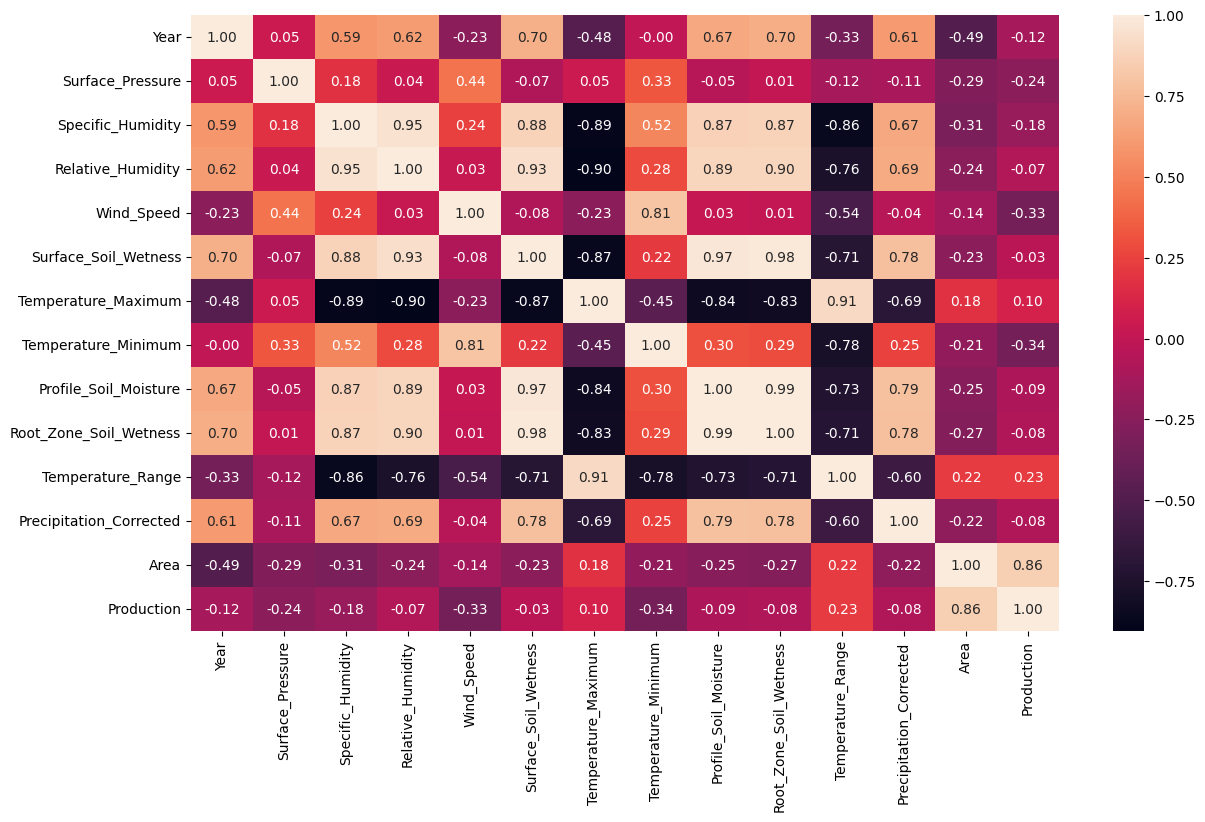

In [10]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [11]:
# Check for missing values
data.isnull().sum()

District                   0
Year                       0
Surface_Pressure           0
Specific_Humidity          0
Relative_Humidity          0
Wind_Speed                 0
Surface_Soil_Wetness       0
Temperature_Maximum        0
Temperature_Minimum        0
Profile_Soil_Moisture      0
Root_Zone_Soil_Wetness     0
Temperature_Range          0
Precipitation_Corrected    0
Area                       0
Production                 0
dtype: int64

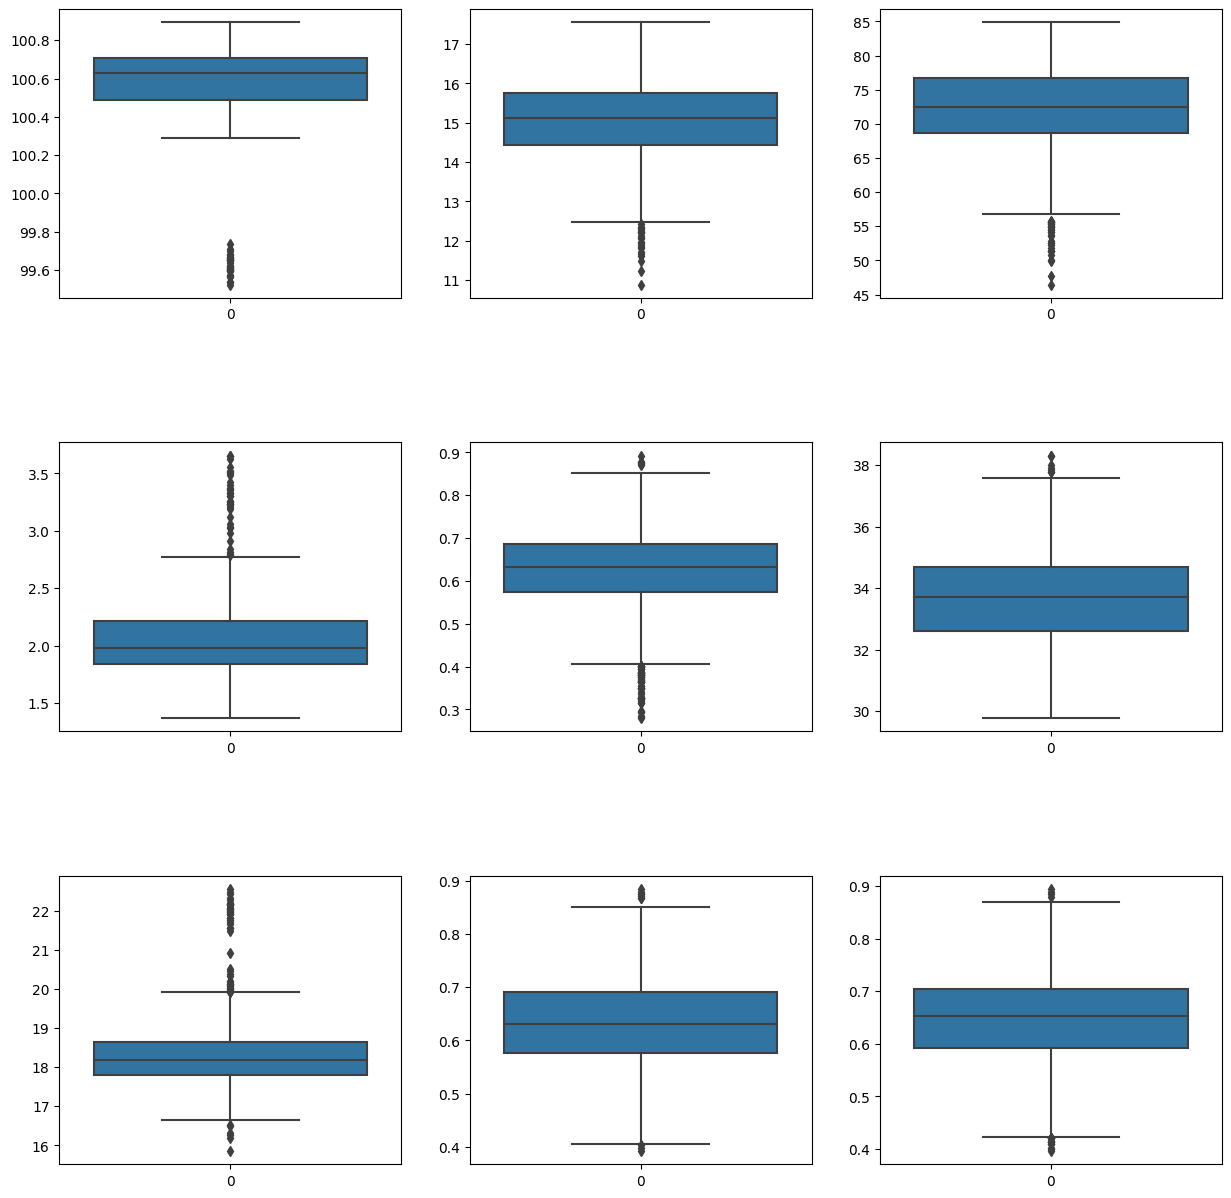

In [12]:
# Check for outliers
fig, axs = plt.subplots(3,3, figsize = (15,15))
plt.subplots_adjust(hspace = 0.5)
sns.boxplot(data['Surface_Pressure'], ax = axs[0,0])
sns.boxplot(data['Specific_Humidity'], ax = axs[0,1])
sns.boxplot(data['Relative_Humidity'], ax = axs[0,2])
sns.boxplot(data['Wind_Speed'], ax = axs[1,0])
sns.boxplot(data['Surface_Soil_Wetness'], ax = axs[1,1])
sns.boxplot(data['Temperature_Maximum'], ax = axs[1,2])
sns.boxplot(data['Temperature_Minimum'], ax = axs[2,0])
sns.boxplot(data['Profile_Soil_Moisture'], ax = axs[2,1])
sns.boxplot(data['Root_Zone_Soil_Wetness'], ax = axs[2,2])
plt.show()

In [13]:
# Split the dataset into input features (X) and target variable (y)
input_cols =['Year', 'Surface_Pressure', 'Specific_Humidity', 'Wind_Speed',
                   'Temperature_Minimum', 'Temperature_Range', 'Area']

X = data[input_cols]
y = data[['Production']]  # Target variable

In [14]:
# Normalizing data to minimize the effect of outliers
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()

input_scaler.fit(X)
output_scaler.fit(y)

X = input_scaler.transform(X)
y = output_scaler.transform(y)

In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, r2,rmse

In [18]:
def create_ann_model(input_shape):
    model = tf.keras.Sequential()
    # model.add(tf.keras.layers.Dense(200, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='linear'))
    return model


In [31]:
# Create and train the ANN model
ann_model = create_ann_model(X_train.shape[1:])
ann_model.compile(optimizer='adam', loss='mae')
early_stop = EarlyStopping(monitor='loss', patience=10)
ann_model.fit(X_train, y_train, epochs=250, batch_size=72,validation_split=0.2,callbacks=[early_stop])

Epoch 1/250
6/6 [==============================] - 1s 25ms/step - loss: 0.0630 - val_loss: 0.0534
Epoch 2/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0494 - val_loss: 0.0403
Epoch 3/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0413 - val_loss: 0.0424
Epoch 4/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0351 - val_loss: 0.0372
Epoch 5/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0308 - val_loss: 0.0259
Epoch 6/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0252 - val_loss: 0.0199
Epoch 7/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.0172
Epoch 8/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0179 - val_loss: 0.0161
Epoch 9/250
6/6 [==============================] - 0s 8ms/step - loss: 0.0170 - val_loss: 0.0158
Epoch 10/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0152 - val_loss: 0.0152
Epoch 11/250
6/6 [==========

In [32]:
# Evaluate the ANN model
mae_ann, mse_ann, r2_ann,rmse_ann = evaluate_model(ann_model, X_test, y_test)
print('ANN Model Evaluation Metrics:')
print('MAE:', mae_ann)
print('MSE:', mse_ann)
print('R2 Score:', r2_ann)
print('RMSE:', rmse_ann)

4/4 [==============================] - 0s 2ms/step
ANN Model Evaluation Metrics:
MAE: 0.010956851725802975
MSE: 0.0002200865701701762
R2 Score: 0.9426375478236702
RMSE: 0.014835314967002763


In [21]:
def create_lstm_model(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(tf.keras.layers.LSTM(128))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='linear'))
    return model

In [22]:
# Reshape the input data for LSTM (assuming 2D input)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
# Create and train the LSTM model
lstm_model = create_lstm_model(X_train_lstm.shape[1:])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=250, batch_size=72,validation_split=0.2,callbacks=[early_stop])

Epoch 1/250
6/6 [==============================] - 5s 146ms/step - loss: 0.0125 - val_loss: 0.0063
Epoch 2/250
6/6 [==============================] - 0s 29ms/step - loss: 0.0086 - val_loss: 0.0057
Epoch 3/250
6/6 [==============================] - 0s 25ms/step - loss: 0.0075 - val_loss: 0.0057
Epoch 4/250
6/6 [==============================] - 0s 26ms/step - loss: 0.0073 - val_loss: 0.0053
Epoch 5/250
6/6 [==============================] - 0s 27ms/step - loss: 0.0072 - val_loss: 0.0052
Epoch 6/250
6/6 [==============================] - 0s 29ms/step - loss: 0.0071 - val_loss: 0.0053
Epoch 7/250
6/6 [==============================] - 0s 23ms/step - loss: 0.0071 - val_loss: 0.0050
Epoch 8/250
6/6 [==============================] - 0s 27ms/step - loss: 0.0070 - val_loss: 0.0049
Epoch 9/250
6/6 [==============================] - 0s 26ms/step - loss: 0.0069 - val_loss: 0.0048
Epoch 10/250
6/6 [==============================] - 0s 27ms/step - loss: 0.0068 - val_loss: 0.0047
Epoch 11/250
6/6 [

In [24]:
# Evaluate the LSTM model
mae_lstm, mse_lstm, r2_lstm, rmse_lstm = evaluate_model(lstm_model, X_test_lstm, y_test)
print('LSTM Model Evaluation Metrics:')
print('MAE:', mae_lstm)
print('MSE:', mse_lstm)
print('R2 Score:', r2_lstm)
print('RMSE:', rmse_lstm)

4/4 [==============================] - 1s 5ms/step
LSTM Model Evaluation Metrics:
MAE: 0.015502494354526204
MSE: 0.000394181932462247
R2 Score: 0.8972620535993843
RMSE: 0.019854015524881787


In [25]:
def plot_actual_vs_predicted(y_test, predictions):
    y_test = output_scaler.transform(y_test)
    predictions = output_scaler.transform(predictions)

    plt.figure(figsize=(8, 6))
    plt.plot(y_test[:100])
    plt.plot(predictions[:100])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()

4/4 [==============================] - 0s 2ms/step


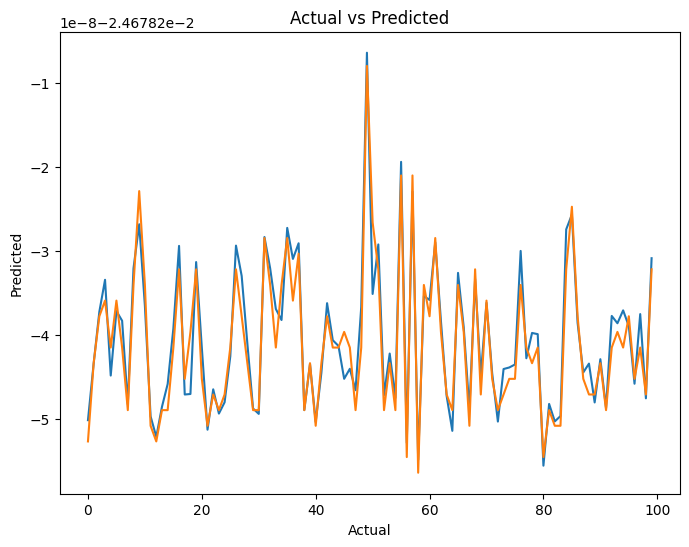

In [33]:
# Make predictions and plot actual vs predicted for ANN model
ann_predictions = ann_model.predict(X_test)
plot_actual_vs_predicted(y_test, ann_predictions)



4/4 [==============================] - 0s 5ms/step


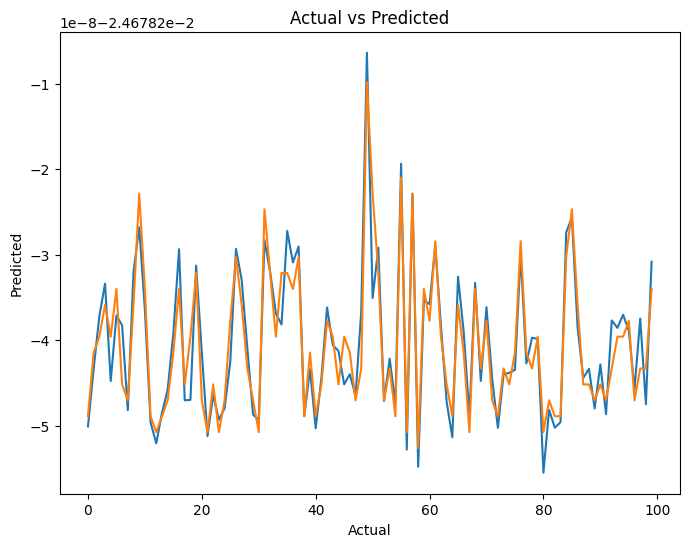

In [34]:
# Make predictions and plot actual vs predicted for LSTM model
lstm_predictions = lstm_model.predict(X_test_lstm)
plot_actual_vs_predicted(y_test, lstm_predictions)

In [28]:
# Preparing Data
temp = data.iloc[-5:]
temp["Year"] = list(range(2021, 2026, 1))
X_temp = temp[input_cols]
X_temp = input_scaler.transform(X_temp)

In [29]:
# Making Predictions
X_temp = np.reshape(X_temp, (X_temp.shape[0], X_temp.shape[1], 1))
y_pred_temp = lstm_model.predict(X_temp, verbose=0)
y_pred_temp = output_scaler.inverse_transform(y_pred_temp)

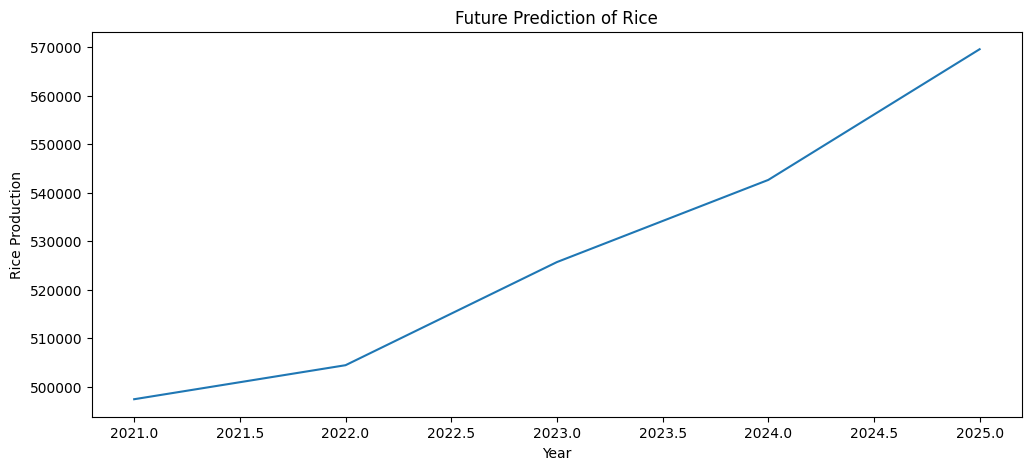

In [30]:
# Ploting Predictions
plt.figure(figsize=(12, 5))
plt.plot(list(range(2021, 2026, 1)), y_pred_temp.flatten())
plt.title("Future Prediction of Rice")
plt.xlabel("Year")
plt.ylabel("Rice Production")
plt.show()